# Data loading 
Next cells are used to load the data we need.

In [1]:
import pandas as pd
import numpy as np 
import scipy.sparse as sps
import os
import sys
import matplotlib.pyplot as plt
sys.path.append('..')


In [2]:
#data which contains users (row), items(col) and implicit interaction (data)
dataset = pd.read_csv('data_train.csv')
dataset

,row,col,data
0,0,10080,1.0
1,0,19467,1.0
2,1,2665,1.0
3,1,7494,1.0
4,1,17068,1.0
...,...,...,...
113263,7945,2476,1.0
113264,7945,12319,1.0
113265,7945,21384,1.0
113266,7946,8699,1.0


# Data pre-processing
Pre-processing of data to check for missing users, items ecc...

In [3]:
users = dataset.row
items = dataset.col
data = dataset.data
URM_all = sps.coo_matrix((data, (users, items)))
URM_all = URM_all.tocsr() #fast row access -> fast access to users 
URM_all.shape

(7947, 25975)

In [5]:
from Base.Evaluation.Evaluator import EvaluatorHoldout
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

#splitting data into train and test. In teoria non serve, da vedere
#URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.85)

#splitting data into train and validation (from the previous training data)
URM_train_1, URM_validation_1 = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.85, seed=1)

URM_train_2, URM_validation_2 = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.85, seed=2)

URM_train_3, URM_validation_3 = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.85, seed=3)

URM_train_4, URM_validation_4 = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.85, seed=4)

URM_train_5, URM_validation_5 = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.85, seed=5)

training_list = [URM_train_1,URM_train_2,URM_train_3,URM_train_4,URM_train_5]
validation_list = [URM_validation_1,URM_validation_2,URM_validation_3,URM_validation_4,URM_validation_5]

type(validation_list)

list

In [30]:
#evaluator for validation (used for hyperparameter tuning)
evaluator_validation_1 = EvaluatorHoldout(URM_validation_1, cutoff_list=[10])
evaluator_validation_2 = EvaluatorHoldout(URM_validation_2, cutoff_list=[10])
evaluator_validation_3 = EvaluatorHoldout(URM_validation_3, cutoff_list=[10])
evaluator_validation_4 = EvaluatorHoldout(URM_validation_4, cutoff_list=[10])
evaluator_validation_5 = EvaluatorHoldout(URM_validation_5, cutoff_list=[10])

evaluator_list = [evaluator_validation_1,evaluator_validation_2,evaluator_validation_3,evaluator_validation_4,evaluator_validation_5]
#evaluator for testing (the final one)
#evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

In [31]:
from SLIM_BPR.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
recommender = SLIM_BPR_Cython(URM_train, recompile_cython=False)

NameError: name 'URM_train' is not defined

In [38]:
 for train,val in zip(training_list, evaluator_list):
        print("printing matrix")
        print(train)
        print(val)

printing matrix
  (0, 10080)	1.0
  (0, 19467)	1.0
  (1, 2665)	1.0
  (1, 7494)	1.0
  (1, 17068)	1.0
  (1, 17723)	1.0
  (1, 20146)	1.0
  (3, 18736)	1.0
  (3, 23037)	1.0
  (4, 477)	1.0
  (4, 6927)	1.0
  (4, 13707)	1.0
  (4, 18999)	1.0
  (4, 19838)	1.0
  (5, 814)	1.0
  (5, 2754)	1.0
  (5, 4481)	1.0
  (5, 5581)	1.0
  (5, 6549)	1.0
  (5, 7583)	1.0
  (5, 8849)	1.0
  (5, 9014)	1.0
  (5, 9658)	1.0
  (5, 12914)	1.0
  (5, 13439)	1.0
  :	:
  (7944, 23519)	1.0
  (7944, 23721)	1.0
  (7944, 23986)	1.0
  (7944, 24022)	1.0
  (7944, 24075)	1.0
  (7944, 24484)	1.0
  (7944, 24806)	1.0
  (7944, 24882)	1.0
  (7944, 24912)	1.0
  (7944, 24990)	1.0
  (7944, 25068)	1.0
  (7944, 25119)	1.0
  (7944, 25314)	1.0
  (7944, 25707)	1.0
  (7944, 25713)	1.0
  (7944, 25746)	1.0
  (7944, 25812)	1.0
  (7944, 25882)	1.0
  (7944, 25953)	1.0
  (7945, 817)	1.0
  (7945, 2476)	1.0
  (7945, 12319)	1.0
  (7945, 21384)	1.0
  (7946, 8699)	1.0
  (7946, 19178)	1.0
printing matrix
  (0, 10080)	1.0
  (0, 19467)	1.0
  (1, 7494)	1.0
  (1, 

In [47]:
x_tick = []
collaborative_MAP = []

for topK in [50,100,200,300]:
    result_MAP=0
    for train,val in zip(training_list, evaluator_list):
        
        recommender = SLIM_BPR_Cython(train, recompile_cython=False)
    
        #remember to specify the positive threshold
        recommender.fit(epochs=200, batch_size=1000, sgd_mode='adagrad', learning_rate=0.001, positive_threshold_BPR=1,  topK = topK)
        
        print('Printing evaluator',val)
        
        result_dict, _ = val.evaluateRecommender(recommender)
        temp_MAP = result_dict[10]["MAP"]
        result_MAP = result_MAP + temp_MAP
    result_MAP = result_MAP/5
    x_tick.append("topk {}".format(topK))
    collaborative_MAP.append(result_MAP)

SLIM_BPR_Recommender: URM Detected 41 (0.52 %) cold users.
SLIM_BPR_Recommender: URM Detected 1975 (7.60 %) cold items.
Unable to read memory status: list index out of range
SLIM_BPR_Recommender: Automatic selection of fastest train mode. Unable to get current RAM status, you may be using a non-Linux operating system. Using dense matrix.
Processed 7947 ( 100.00% ) in 0.70 seconds. BPR loss is 5.13E-06. Sample per second: 11335
SLIM_BPR_Recommender: Epoch 1 of 200. Elapsed time 0.02 sec
Processed 7947 ( 100.00% ) in 0.73 seconds. BPR loss is 1.47E-05. Sample per second: 10930
SLIM_BPR_Recommender: Epoch 2 of 200. Elapsed time 0.05 sec
Processed 7947 ( 100.00% ) in 0.75 seconds. BPR loss is 2.54E-05. Sample per second: 10581
SLIM_BPR_Recommender: Epoch 3 of 200. Elapsed time 0.07 sec
Processed 7947 ( 100.00% ) in 0.78 seconds. BPR loss is 4.50E-05. Sample per second: 10240
SLIM_BPR_Recommender: Epoch 4 of 200. Elapsed time 0.10 sec
Processed 7947 ( 100.00% ) in 0.80 seconds. BPR loss is 

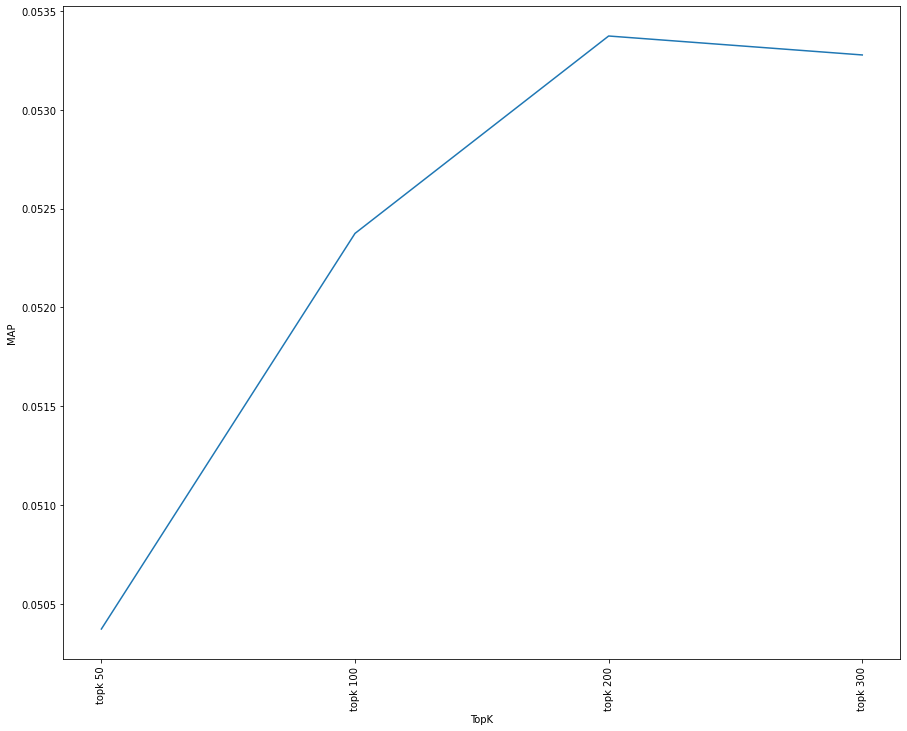

In [48]:
plt.figure(figsize=(15,12))
plt.plot(x_tick, collaborative_MAP, label="Collaborative", )
plt.ylabel('MAP')
plt.xlabel('TopK')
plt.xticks(rotation='vertical')
plt.show()

In [49]:
test_users = pd.read_csv('data_target_users_test.csv')
test_users

,user_id
0,0
1,1
2,2
3,3
4,4
...,...
7939,7942
7940,7943
7941,7944
7942,7945


In [50]:
recommender = SLIM_BPR_Cython(URM_all, recompile_cython=False)
#remember to specify the positive threshold
recommender.fit(epochs=200, batch_size=1000, sgd_mode='adagrad', learning_rate=0.001, positive_threshold_BPR=1, topK=200)
user_id = test_users['user_id']
recommendations = recommender.recommend(user_id,cutoff = 10)


SLIM_BPR_Recommender: URM Detected 1079 (4.15 %) cold items.
Deallocating Cython objects
Unable to read memory status: list index out of range
SLIM_BPR_Recommender: Automatic selection of fastest train mode. Unable to get current RAM status, you may be using a non-Linux operating system. Using dense matrix.
Processed 7947 ( 100.00% ) in 0.34 seconds. BPR loss is 4.75E-06. Sample per second: 23045
SLIM_BPR_Recommender: Epoch 1 of 200. Elapsed time 0.02 sec
Processed 7947 ( 100.00% ) in 0.37 seconds. BPR loss is 2.22E-05. Sample per second: 21489
SLIM_BPR_Recommender: Epoch 2 of 200. Elapsed time 0.05 sec
Processed 7947 ( 100.00% ) in 0.40 seconds. BPR loss is 3.78E-05. Sample per second: 20077
SLIM_BPR_Recommender: Epoch 3 of 200. Elapsed time 0.08 sec
Processed 7947 ( 100.00% ) in 0.42 seconds. BPR loss is 5.52E-05. Sample per second: 18886
SLIM_BPR_Recommender: Epoch 4 of 200. Elapsed time 0.10 sec
Processed 7947 ( 100.00% ) in 0.45 seconds. BPR loss is 8.15E-05. Sample per second: 17

In [51]:
for index in range(len(recommendations)):
    #print(element)
    recommendations[index]=np.array(recommendations[index])
    #print(type(element))
print(len(recommendations))

7944


In [52]:
test_users['item_list']= recommendations
#test_users['item_list'] =  test_users['item_list'].apply(lambda x: x.replace('[','').replace(']','')) 
test_users['item_list'] = pd.DataFrame([str(line).strip('[').strip(']').replace("'","") for line in test_users['item_list']])

#convert the string columns to int
#test_users['item_list'] = test_users['item_list'].astype(int)
test_users
test_users.to_csv('submission.csv', index=False)
